<a href="https://colab.research.google.com/github/jeekyung/ESAA/blob/main/ESAA_OB_week3_hands_on_model_train_p_157~202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ESAA OB 3주차 과제 - 핸즈온 CHAPTER4 모델 훈련**

---

>머신러닝 모델과 훈련 알고리즘의 작동 원리를 이해할 시, 적절한 모델, 올바른 훈련 알고리즘, 작업에 맞는 좋은 하이퍼파라미터를 빠르게 찾을 수 있음<br/>
이 장에서 언급하는 대부분의 주제는 신경망을 이해,구축,훈련시키는 데 필수

>가장 간단한 모델 중 하나인 **선형 회귀**부터 시작<br/>
-훈련시키는 2가지 방법 소개
* 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터(즉, 훈련 세트에 대해 비요 함수를 최소화하는 모델 파라미터)를 해석적으로 구함
* **경사 하강법(GD)**이라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화시킴 -> 결국에는 앞의 방법과 동일한 파라미터로 수렴
+) 배치(batch) 경사 하강법, 미니배치 경사 하강법, 확률적(stochastic) 경사 하강법(SGD)

> 이후 **비선형 데이터셋**에 훈련시킬 수 있는 조금 더 복잡한 모델인 **다항 회귀** 살펴봄
* 선형 회귀보다 파라미터가 많아 과적합되기 더 쉬움
* 학습 곡서(learning curve)을 사용해 모델이 과대적합되는지 감지하는 방법
* 훈련 세트의 과대적합을 감소시킬 수 있는 몇가지 규제 기법 소개<br/>
마지막으로 **분류** 작업에 널리 사용하는 모델인 **로지스틱 회귀**와 **소프트맥스 회귀** 살펴보기

## **4.1 선형 회귀**
---

>삶의 만족도에 대한 간단한 선형 회귀 모델<br/>
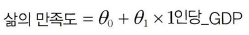
* 입력 특성인 '1인당_GDP'에 대한 선형 함수
* 모델 파라미터: θ0, θ1

>더 일반적으로 선형 모델은 식 4-1에서처럼 입력 특성의 가중치 합과 편향(bias)(=절편 intercept)이라는 상수를 더해 예측을 만듦<br/>
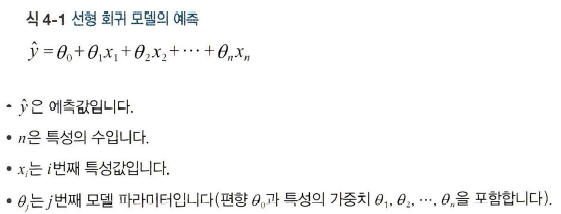

>이 식은 식 4-2처럼 벡터 형태로 더 간단히 표현 가능<br/>
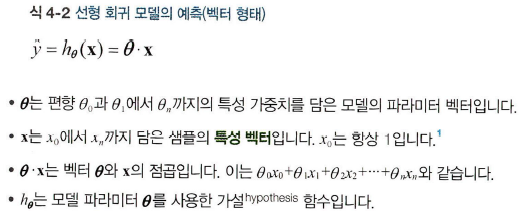

>모델 훈련 = 모델이 훈련 세트에 가장 잘 맞도록 **모델 파라미터를 설정**하는 것<br/>
모델이 훈련 데이터에 얼마나 잘 들어맞는지 성능 측정 필요<br/>
회귀에 가장 널리 사용되는 성능 측정 지표인 **RMSE**(평균 제곱근 오차) 사용<br/>
선형 회귀 모델을 훈련시키기 위해 RMSE를 최소화하는 θ 찾아야함<br/>
(실제로는 RMSE보다 MSE(평균 제곱 오차)를 최소화하는 것이 더 간단)

>훈련 세트 X에 대한 선형 회귀 가설 hθ의 MSE는 식4-3처럼 계산<br/>
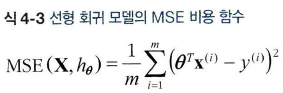

### **4.1.1 정규방정식**
---

>정규방정식(normal equation)
* 비용함수를 최소화하는 θ값을 찾기 위한 해석학적인 방법
* 결과를 바로 얻을 수 있는 수학 공식<br/>
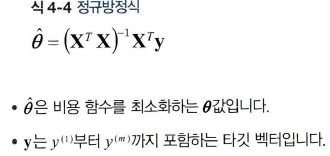

In [ ]:
# 정규방정식 테스트 위해 선형처럼 보이는 데이터 생성
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

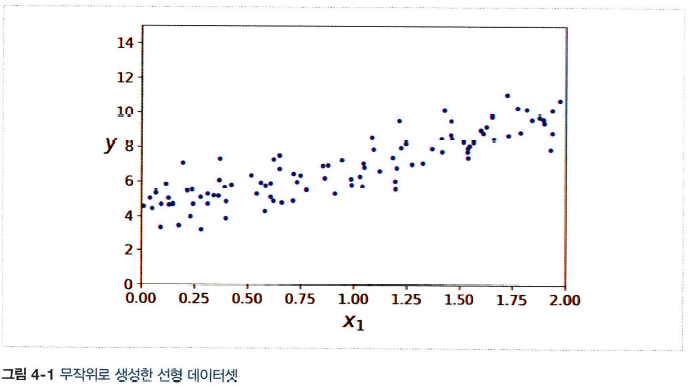

In [ ]:
# 정규방정식을 사용해 θ 추정값 계산
X_b = np.c_[np.ones((100,1)),X]    #모든 샘플에 x0=1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

* 이 데이터를 생성하기 위해 사용한 함수는 y = 4 + 3x1 + 가우시안_잡음

In [ ]:
# 정규방정식으로 계산한 값 확인.
theta_best

array([[4.00943103],
       [3.08240625]])

>* θ0=4, θ1=3을 기대했음
* 매우 비슷하지만 잡음 때문에 함수의 파라미터를 정확하게 재현하지 못함

In [ ]:
#θ 추정값을 사용해 예측해보기
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]  #모든 샘플에 x0=1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.00943103],
       [10.17424354]])

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

#폰트 설치 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc("font", family = "NanumBarunGothic")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

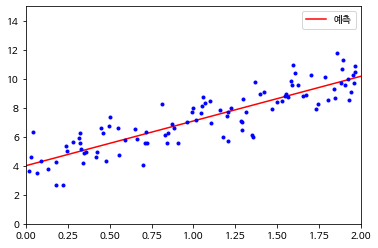

In [ ]:
# 모델의 예측을 그래프에 나타내보기
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", label="예측")
plt.plot(X,y,"b.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [ ]:
# 사이킷런에서 선형 회귀를 수행하는 것은 간단함.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_, lin_reg.predict(X_new)

(array([4.00943103]), array([[3.08240625]]), array([[ 4.00943103],
        [10.17424354]]))

In [ ]:
# LinearRegression 클래스는 scipy.linalg.lstsq() 함수를 기반으로 함. 이 함수 직접 호출 가능
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.00943103],
       [3.08240625]])

* 이 함수는  image.png 을 계산함
* 여기서 image.png는 image.png의 유사 역행렬(무어-펜로즈 역행렬)

In [ ]:
# 유사역행렬은 np.linalg.pinv() 함수로 직접 구할 수 있음
np.linalg.pinv(X_b).dot(y)

array([[4.00943103],
       [3.08240625]])

>유사역행렬 자체는 **특잇값 분해(SVD)**라 부르는 표준 행렬 분해 기법을 사용해 계산됨.<br/>
SVD는 훈련 세트 행렬 X를 3개의 행렬 곱셈 image.png로 분해함

>유사역행렬은 image.png로 계산됨
1.  image.png를 계산하기 위해 image.png를 먼저 구하고 어떤 낮은 임곗값보다 작은 모든 수를 0으로 바꿈
2. 0이 아닌 모든 값을 역수로 치환
3. 행렬 전치
* 정규방정식을 계산하는 것보다 훨씬 효율적
* 특이 행렬이더라도(행렬 image.png의 역행렬이 없더라도) 유사역행렬은 항상 구할 수 있음(정규방정식은 작동하지 않음)

### **4.1.2 계산 복잡도**
---

> 정규방정식은 (n+1)x(n+1) 크기의 image.png의 역행렬을 계산함(n은 특성 수)<br/>
역행렬을 계산하는 계산 복잡도는 일반적으로 image.png에서 image.png 사이<br/>
사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법은 약 image.png(특성의 개수가 2배면 계산 시간은 4배)

>(정규방정식이나 다른 알고리즘으로) 학습된 선형 회귀ㅣ모델의 예측 계산 복잡도는 샘플 수와 특성 수에 선형젹(예측은 빠름)(예측하려는 샘플 혹은 특성이 2배면 계산 시간도 2배)

## **4.2 경사 하강법(GD)**
---

>경사 하강법의 기본 아이디어는 비용함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것<br/>
파라미터 벡터 image.png에 대해 비용함수의 현재 gradient 계산->gradient가 감소하는 방향으로 진행하다 gradient가 0이 되면 최솟값에 도달한 것.


>image.png를 임의의 값으로 시작해서(무작위 초기화) 한번에 조금씩 비용함수(MSE와 같은)가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킴<br/>
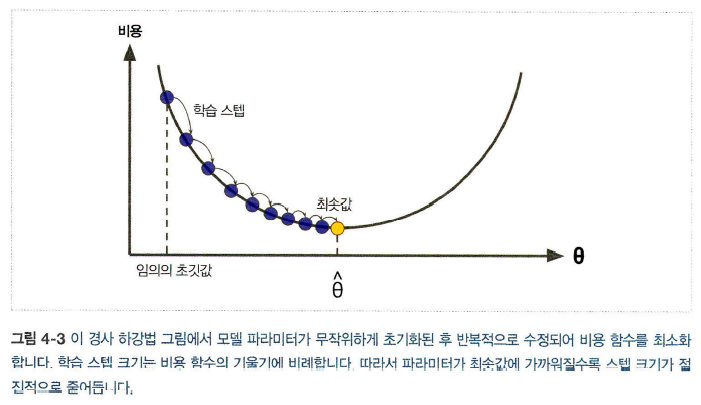

>경사하강법에서 중요한 파라미터는 스텝의 크기로, **학습률** 하이퍼파라미터로 결정됨
* 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야하므로 시간이 오래 걸림
* 학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰게 되어 이전보다 더 높은 곳으로 올라가게 될 수 있음(알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 못찾게함)
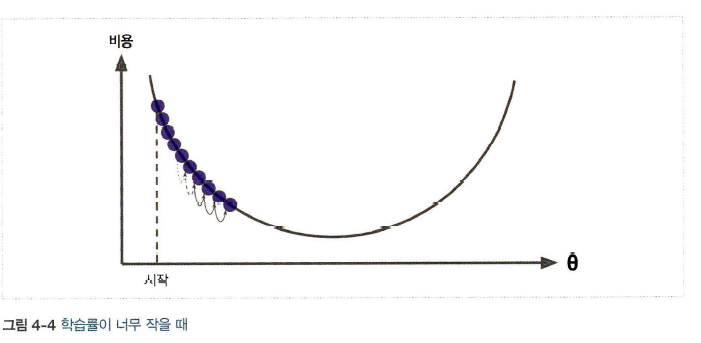
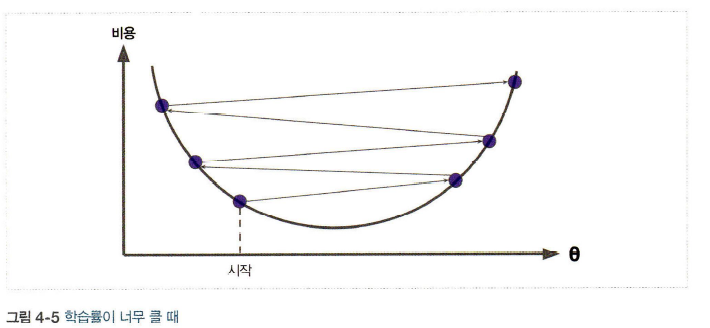

>**경사하강법의 문제점**<br/>
모든 비용함수가 매끈한 그릇같진 않음<br/>
특이한 지형이 있으면 최솟값으로 수렴하기 매우 어려움<br/>
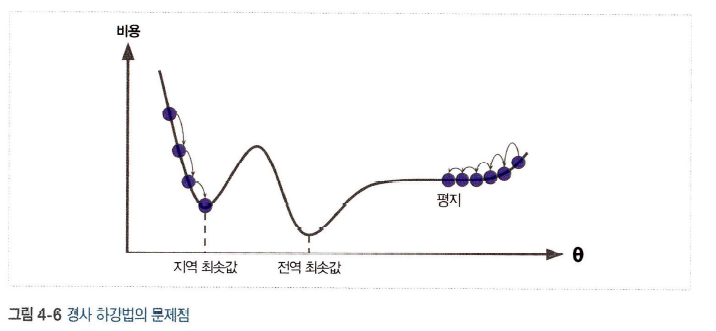

>선형 회귀를 위한 MSE 비용함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함수
1. 지역 최솟값이 없고 하나의 전역 최솟값만 있음
2. 연속된 함수이고 기울기가 갑자기 변하지 않음<br/>
-> 이 두 사실로부터 경사하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장함

>비용함수는 그릇 모양을 하고 있지만 특성들의 스케일이 매우 다를 경우 길쭉한 모양일 수 있음<br/>
[그림 4-7]은 특성1과 특성2의 스케일이 같은 훈련세트(왼쪽)와 특성1이 특성2보다 더 작은 훈련세트(오른쪽)에 대한 경사하강법
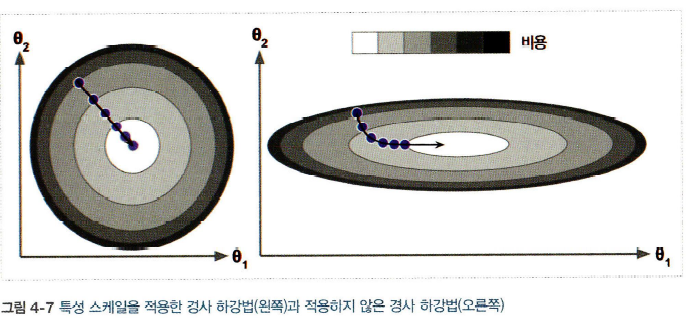

>오른쪽 그래프는 평평한 골짜기를 길게 돌아서 나감(시간이 오래걸림) ->반드시 모든 특성이 같은 스케일을 갖도록 만들어야함<br/>
이 그림은 모델 훈련이 (훈련 세트에서) 비용함수를 최소화하는 모델 파라미터의 조합을 찾는 일임을 설명해줌<br/>
이를 모델의 **파라미터 공간**에서 찾는다고 말함<br/>
모델이 가진 파라미터가 많을수록 이 공간의 차원은 커지고 검색이 더 어려워짐

### **4.2.1 배치 경사 하강법**
---

>경사 하강법을 구현하려면 각 모델 파라미터 image.png에 대해 비용함수의 gradient를 계산해야함(image.png가 조금 변경될 때 비용함수가 얼마나 바뀌는지를 계산해야함)<br/>
이를 **편도함수**라고 함<br/>
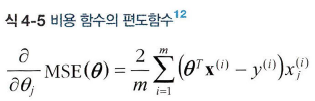

>편도함수를 각각 계산하는 대신 한꺼번에 계산 가능<br/>
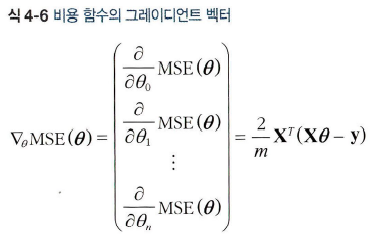

>이 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산하여 이 알고리즘을 **배치 경사 하강법**이라 함<br/>
즉, 매 스텝에서 훈련 데이터 전체를 사용함
* 큰 훈련 세트에서는 아주 느림
* 그러나 경사 하강법은 특성 수에 민감하지 않다는 점은 정규방정식이나 SVD 분해보다 유리

>위로 향하는 gradient 벡터가 구해지면 반대 방향인 아래로 가야함(여기서 학습률image.png 사용됨)(내려가는 스텝의 크기 결정)<br/>
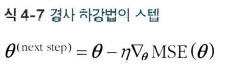

In [ ]:
# 위의 알고리즘 간단히 구현
eta = 0.1  #학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)   #무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [ ]:
#계산된 theta 확인
theta

array([[4.00943103],
       [3.08240625]])

* 정규방정식으로 찾은 것과 정확히 같음

>학습률 image.png를 바꿀 경우, [그림 4-8]은 세 가지 다른 학습률을 사용하여 진행한 경사하강법의 스텝 처음 10개를 보여줌(점선은 시작점을 나타냄)<br/>
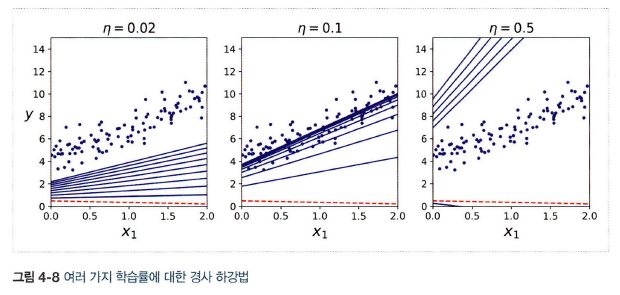

>* 왼쪽은 학습률이 너무 낮아 알고리즘은 최적점에 도달하겠지만 시간이 오래 걸릴것
* 가운데는 학습률이 적당하여 반복 몇번만에 이미 최적점에 수렴
* 오른쪽은 학습률이 너무 높아 알고리즘이 이리저리 널뛰면서 스텝마다 최적점에서 점점 더 멀어져 발산함.

>적절한 학습률을 찾기 위해 그리드 탐색을 사용하는데, 이때 반복횟수를 지정하는 방법:<br/>
반복 횟수를 아주 크게 지정하고 gradient 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값 image.png(**허용오차**)보다 작아지면 경사하강법이 거의 최솟값에 도달한 것이므로 알고리즘 중지

### **4.2.2 확률적 경사하강법**
---

>배치 경사하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 gradient를 계산한다는 사실<br/>
이와 정반대로 **확률적 경사 하강법**은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 gradient를 계산함
* 매 반복에서 다뤄야 할 데이터가 매우 적어 한번에 하나의 샘플을 처리하면 알고리즘이 훨씬 빠름
* 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있음
* 반면, 확률적(즉, 무작위)이기 때문에 배치 경사 하강법보다 훨씬 불안정(비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치면서 평균적으로 감소)
* 비용 함수가 매우 불규칙할 경우 알고리즘이 지역 최솟값을 건너뛸 수 있도록 도와주므로 전역 최솟값을 찾을 가능성이 높음

> 무작위성은 지역 최솟값에서 탈출시켜주지만 전역 최솟값에 다다르지 못하게 한다는 점에서 좋지 않음<br/>
해결책: **학습률을 점진적으로 감소**시키는 것<br/>
매 반복에서 학습률을 결정하는 함수를 **학습 스케줄** 이라 함
* 학습률이 너무 빨리 줄어들면 지역 최솟값에 갇히거나 최솟값까지 가는 중간에 멈출 수 있음
* 학습률이 너무 천천히 줄어들면 오랫동안 최솟값 주변을 맴돌거나 훈련을 너무 일찍 중지해서 지역 최솟값에 머무를 수 있음<br/>
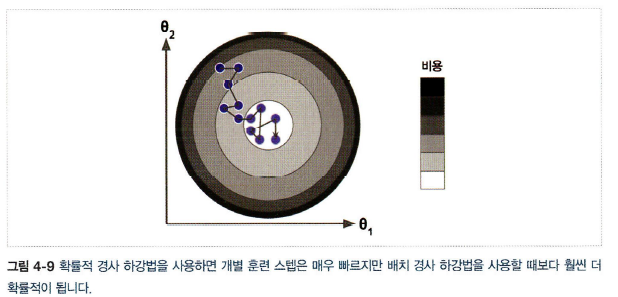


In [ ]:
# 간단한 학습 스케줄을 사용한 확률적 경사 하강법으 ㅣ구현
n_epochs = 50
t0,t1 = 5, 50    # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1)   #무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m +i)
    theta = theta - eta * gradients

>일반적으로 한 반복에서 m번 되풀이되고, 이때 각 반복을 에포크(epoch)라고 함<br/>
배치 경사 하강법 코드가 전체 훈련 세트에 대해 1000번 반복하는 동안 이 코드는 훈련 세트에서 50번만 반복하고도 매우 좋은 값에 도달함

In [ ]:
theta

array([[4.05974482],
       [3.08362602]])

>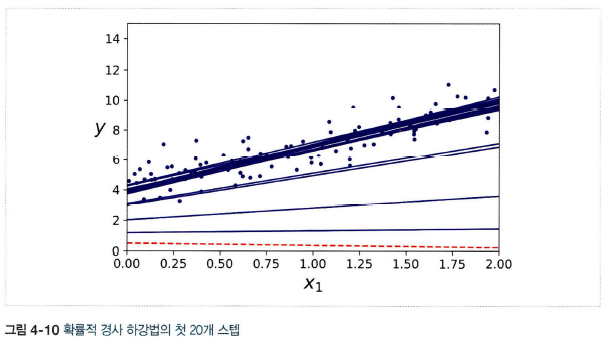
* 훈련 스텝의 첫 20개(스텝이 불규칙하게 진행됨)

> 샘플은 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 어떤 샘플은 전혀 선택되지 못할 수 있음

> 사이킷런에서 SGD 방식으로 선형회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는 SGDRegressor 클래스를 사용
* 다음 코드는 최대 1,000번 에포크 동안 실행되거나(max_iter=1000) 한 에포크에서 0.001보다 적게 손실이 줄어들 때까지 실행됨(tol=1e-3)
* 학습률 0.1(eta0=0.1)로 기본 학습 스케줄을 사용
* 규제는 전혀 사용하지 않음(penalty=None)

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_
# 여기서도 정규방정식으로 구한 것과 매우 비슷한 값을 얻음

(array([4.00684835]), array([3.07066423]))

### **4.2.3 미니배치 경사 하강법**
---

> 각 스텝에서 전체 훈련 세트(배치 경사 하강법에서처럼)나 하나의 샘플(확률적 경사 하강법에서처럼)을 기반으로 gradient를 계산하는 것이 아니라 **미니배치**라 부르는 임의의 작은 샘플 세트에 대해 gradient를 계산함<br/>
확률적 경사 하가법에 비한 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상

>* 특히 미니배치를 어느 정도 크게 하면 파라미터 공간에서 SGD보다 덜 불규칙하게 움직임. 결국 미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달하게 될 것.
* 하지만 지역 최솟값에서 빠져나오기는 더 힘들지도 모름(선형 회귀와 같지 않고 지역 최솟값이 문제가 되는 경우)

>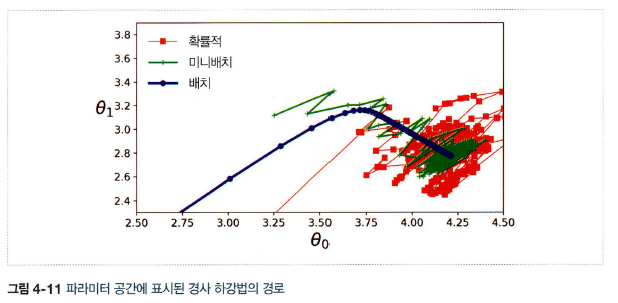<br/>
세 가지 경사 하강법 알고리즘이 훈련 과정 동안 파라미터 공간에서 움직인 경로
* 모두 최솟값 근처에 도달했지만 배치 경사 하강법의 경로가 실제로 최솟값에서 멈춘 반면 확률적 경사 하강법과 미니배치 경사 하강법은 근처에서 맴돌고 있음
* 그렇지만 배치 경사 하강법에는 매 스텝에서 많은 시간이 소요되고, 확률적 경사 하강법과 미니배치 경사 하강법도 적절한 학습 스케줄을 사요하면 최솟값 도달 가능

>지금까지 논의한 알고리즘을 선형 회귀를 사용해 비교<br/>
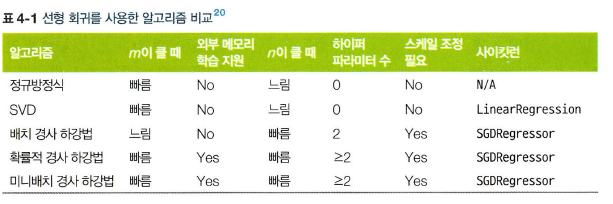

> m은 훈련 샘플 수, n은 특성 수
* 훈련 결과에 거의 차이가 없음.

## **4.3 다항 회귀**
---

>비선형 데이터를 학습하는 데 선형 모델 사용 가능<br/>
각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델 훈련시킴<br/>
이런 기법을 **다항 회귀**라고 함

> 예를 들어 먼저 간단한 2차방정식으로 비선형 데이터 생성

In [ ]:
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

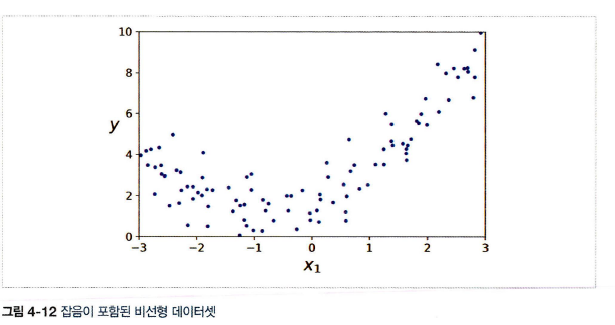

In [ ]:
# 훈련 세트에 있는 각 특성을 제곱(2차 다항)하여 새로운 특성으로 추가함
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)    #X_poly는 원래 특성 X와 이 특성의 제곱을 포함함
X[0], X_poly[0]

(array([1.07472648]), array([1.07472648, 1.155037  ]))

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.04890657]), array([[0.94694247, 0.52135391]]))

>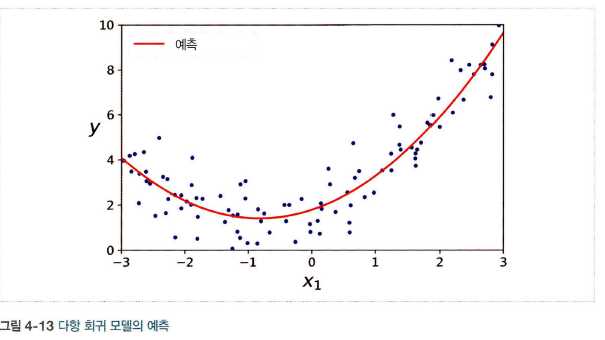<br/>
나쁘지 않음

>특성이 여러개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있음(일반적인 선형회귀 모델에서는 불가능)<br/>
PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문

## **4.4 학습 곡선**
---

>고차 다항 회귀일수록 보통의 선형 회귀에서보다 훈련 샘플에 가능한 한 가까이 가려고 구불구불하게 감<br/>
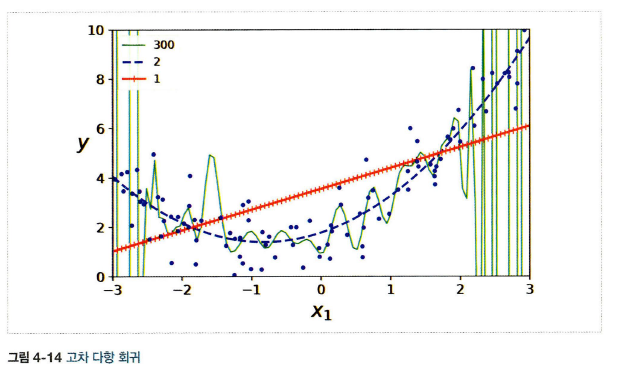<br/>
이 경우 훈련데이터에 과대 적합됨(선형 모델은 과소적합)

>모델이 데이터에 과대적합 또는 과소적합되었는지 알 수 있는 방법
1. 교차 검증 사용.
* 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘다면 모델이 과대적합된 것.(모델이 너무 복잡합)
* 양쪽에 모두 좋지 않으며 과소적합(모델이 너무 단순함)
2. **학습 곡선** 살펴보기
* 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기(또는 훈련 반복)의 함수로 나타냄
* 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 됨

In [ ]:
#주어진 훈련 데이텅에서 모델의 학습 곡선을 그리는 함수 정의하는 코드
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1,len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

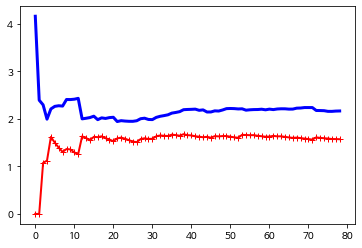

In [ ]:
# 단순 션형 회귀 모델(직선)의 학습 곡선
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

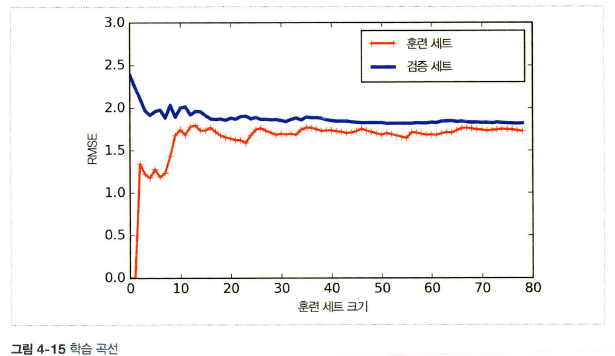

> 이 모델은 과소적합 모델의 전혀적 모습
1. 훈련 데이터의 성능
* 훈련 세트에 하나 혹은 두 개의 샘플이 있을 땐 모델이 완벽하게 작동하다가 샘플이 추가될수록 비선형이기 때문에 완벽 학습 불가. 점차 오차가 상승하다가 평편해짐
2. 검증 데이터의 성능
* 샘플이 추가될 수록 검증 오차 감소.

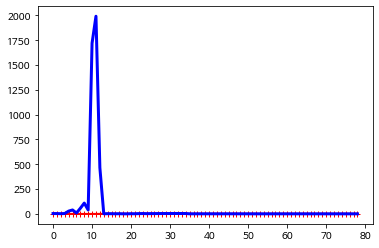

In [ ]:
#같은 데이터에서 10차 다항 회귀 모델의 학습 곡선 그리기
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
  ])

plot_learning_curves(polynomial_regression, X, y)

>이전과의 두가지 중요한 차이점
* 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음
* 두 곡선 사이에 공간이 있어 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻(과대적합 모델의 특징) 그러나 더 큰 훈련 세트 사용 시 두 곡선이 점점 가까워짐

>**편향/분산 트레이드오프**<br/>
모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현 가능
1. 편향
* 잘못된 가정으로 인한 것
2. 분산
* 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감
3. 줄일 수 없는 오차
* 데이터 자체에 있는 잡음 때문에 발생<br/>
모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향은 줄어든다. 모델의 복잡도가 줄어들면 반대(트레이드오프)

## **4.5 규제가 있는 선형 모델**
---

>과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것(즉, 모델을 제한하는 것)<br/>
선형 회귀 모델: 모델의 가중치 제한 / 다항 회귀 모델: 다항식의 차수 감소

### **4.5.1 릿지 회귀**
---

> 릿지 회귀(티호노프 규제)는 규제가 추가된 선형 회귀 버전<br/>
규제항이 비용 함수에 추가됨 = 모델의 가중치가 가능한 한 작게 유지되도록 노력<br/>
규제항은 훈련하는 동안에만 비용 함수에 추가되고 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가함

>하이퍼파라미터 image.png는 모델을 얼마나 많이 규제할 지 조절
* 0이면 선형 회귀와 같아짐
* 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 됨<br/>
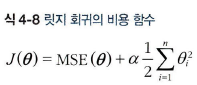

> [그림 4-17]은 선형 데이터에 몇 가지 다른 image.png를 사용해 릿지 모델을 훈련시킨 결과
* 왼쪽 그래프는 평범한 릿지 모델을 사용해 선형적인 예측을 만듦
* 오른쪽 그래프는 PolynomialFeatures(degree=10)을 사용해 먼저 데이터를 확장하고 StandardScaler를 사용해 스케일을 조정한 후 릿지 모델을 적용. 결국 이는 릿지 규제를 사용한 다항 회귀가 됨. image.png를 증가시킬수록 직선에 가까워짐. 즉, 모델의 분산은 줄지만 편향은 커지게 됨<br/>
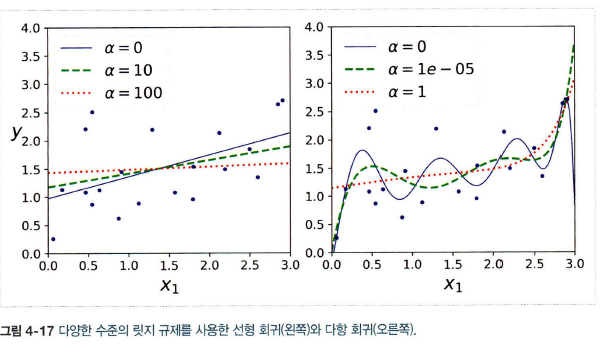

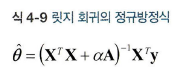

In [ ]:
# 사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용하는 예
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.39440923]])

In [ ]:
# 확률적 경사 하강법을 사용했을 경우
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.37712381])

### **4.5.2 라쏘 회귀**
---

>라쏘 회귀는 선형 회귀의 또 다른 규제된 버전<br/>
릿지 회귀처럼 비용 함수에 규제항을 더하지만 l2 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 l1 노름 사용<br/>
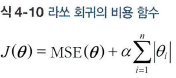

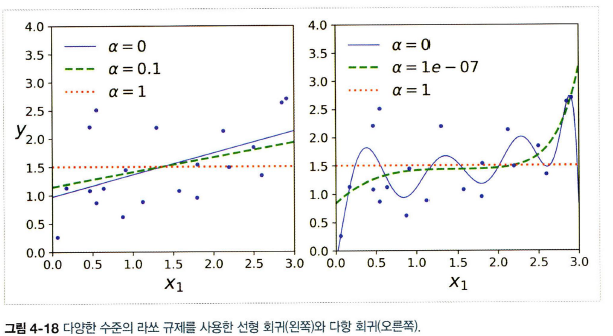

>라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 제거하려고 한다는 점<br/>
즉, 라쏘 회귀는 자동으로 특성 선택을 하고 희소 모델을 만듦<br/>
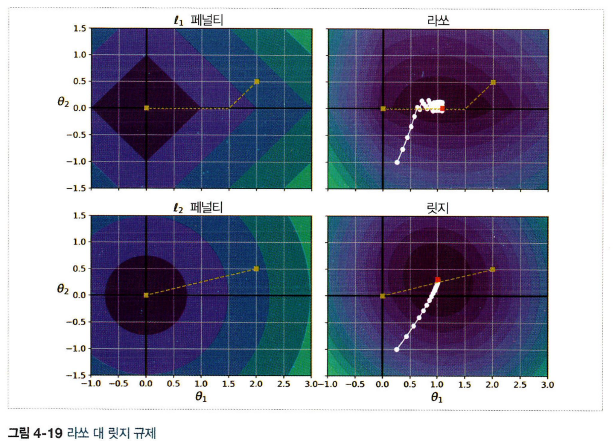

>라쏘의 비용 함수는 image.png에서 미분 가능하지 않지만 sugbradient vector g를 사용하면 경사 하강법 적용 가능<br/>
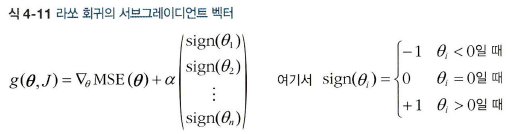

In [ ]:
# 라쏘 클래스를 사용한 간단한 사이킷런 예제
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.36148468])

### **4.5.3 엘라스틱넷**
---

>엘라스틱넷은 릿지 회귀와 라쏘 회귀를 절충한 모델<br/>
규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용해 조절함<br/>
r=0이면 엘라스틱넷은 릿지 회귀와 같고, r=1이면 라쏘 회귀와 같음<br/>
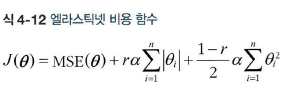

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.36186165])

> 보통의 선형 회귀(즉, 규제가 없는 모델), 릿지, 라쏘, 엘라스틱넷은 언제 사용해야 할까?<br/>
규제가 약간 있는 것은 대부분의 경우 좋으므로 평범한 선형 회귀는 피해야함.<br/>
릿지가 기본이 되지만 쓰이는 특성이 정해져 있다고 의심되면 라쏘나 엘라스틱넷 사용

### **4.5.4 조기 종료**
---

>경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 아주 색다른 방식은 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것 = **조기 종료**<br/>
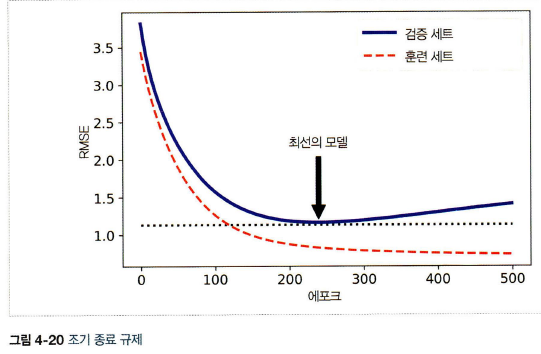

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

#데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("st_scaler", StandardScaler())
  ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)  #훈련을 이어서 진행
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

## **4.6 로지스틱 회귀**
---

>어떤 회귀 알고리즘은 분류에서도 사용 가능<br/>
로지스틱 회귀(logistic regression)는 샘플잉 특정 클래스에 속할 확률을 추정하는 데 널리 사용됨<br/>
* 추정 확률이 50%가 넘으면 레이블이 '1'인 양성 클래스
* 아니면 클래스에 속하지 않는 레이블이 '0'인 음성 클래스<br/>
이를 이진 분류기라 함

### **4.6.1 확률 추정**
---

>선형 회귀 모델과 같이 로지스틱 회귀 모델은 입력 특성의 가중치 합을 계산 후 편향을 더함<br/>
그러나 선형 회귀처럼 바로 결과를 출력하지 않고 결괏값의 로지스틱을 출력함<br/>
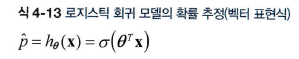

>로지스틱(image.png(·)로 표시)은 0과 1 사이의 값을 출력하는 시그모이드 함수

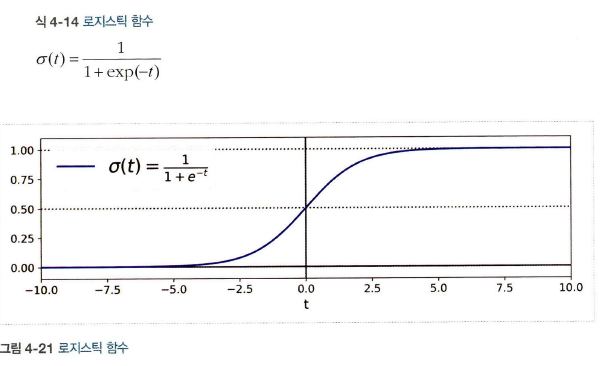

>로지스틱 회구 ㅣ모델이 샘플 x가 양성 클래스에 속할 확률을 추정하면 이에 대한 예측 y는 쉽게 구할 수 있음<br/>
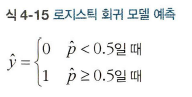

### **4.6.2 훈련과 비용 함수**
---

>로지스틱 회귀 모델이 훈련 시키는 방법<br/>
훈련의 목적은 양성 샘플(y=1)에 대해서는 높은 확률을 추정하고 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 image.png를 찾는 것<br/>
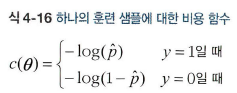<br/>
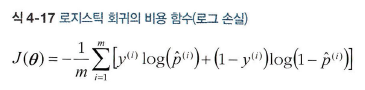<br/>
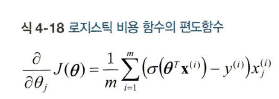

### **4.6.3 결정 경계**
---

> 붓꽃 데이터셋을 사용해 분류기 만들기

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris["data"][:,3:]   #꽃잎의 너비
y = (iris["target"] == 2).astype(np.int)   # 1 Iris-Virginica면 1, 그렇지 않으면 0

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

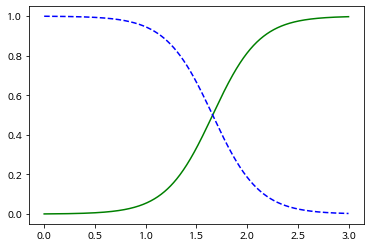

In [ ]:
# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률 계산
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],'g-',label = 'Iris virginica')
plt.plot(X_new,y_proba[:,0],'b--',label = 'Not Iris virginica')

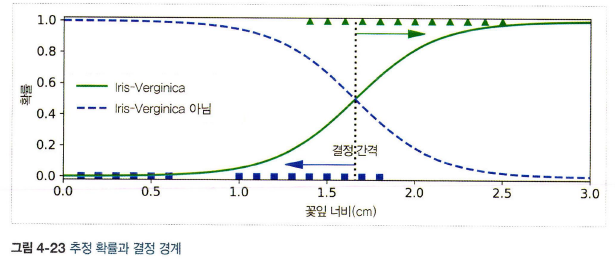

>꽃잎 너비가 1.6cm보다 크면 분류기는 Iris-Verginica로 분류하고, 그보다 작으면 아니라고 예측할 것

In [ ]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

>[그림 4-24]는 같은 데이터셋을 ㅣ번에는 꽃잎 너비와 꽃잎 길이 두 개의 특성으로 보여줌<br/>
점선은 모델이 50% 확률을 추정하는 지점으로, 이 모델의 결정 경계<br/>
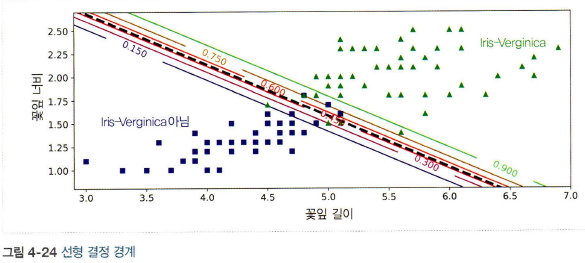

### **4.6.4 소프트맥스 회귀**
---

>로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화할 수 있음<br/>
이를 소프트맥스 회귀 또는 다항 로지스틱 회귀라고 함
* 샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 sk(x)를 계산
* 그 점수에 소프트맥스 함수(또는 정규화된 지수 함수)를 적용하여 각 클래스의 확률 추정<br/>
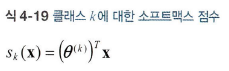
* 각 클래스는 자신만의 파라미터 벡터가 있는데, 이 벡터들은 파라미터 행렬에 행으로 저장됨
* 샘플 x에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스 k에 속할 확률 pk를 추정할 수 있음
* 이 함수는 각 점수에 지수 함수를 적용한 후 저규화함(모든 지수 함수 결과의 합으로 나눔)
* 일반적으로 이 점수를 로짓 또는 로그-오즈라고 부름<br/>
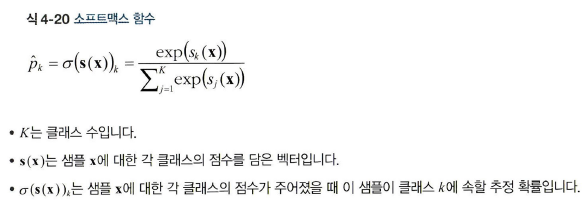

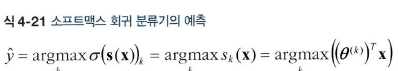

>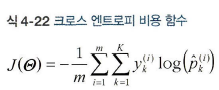<br/>
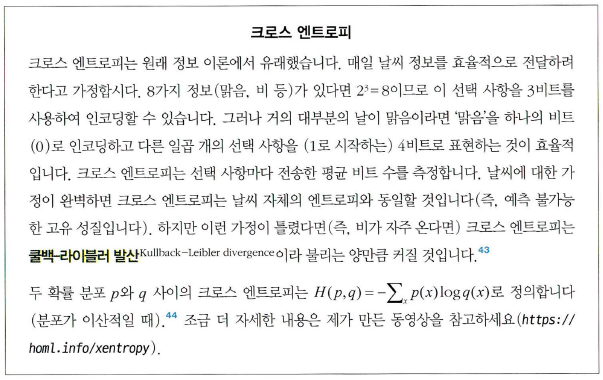


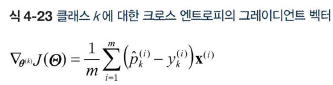

In [ ]:
X = iris["data"][:, (2,3)]  #꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

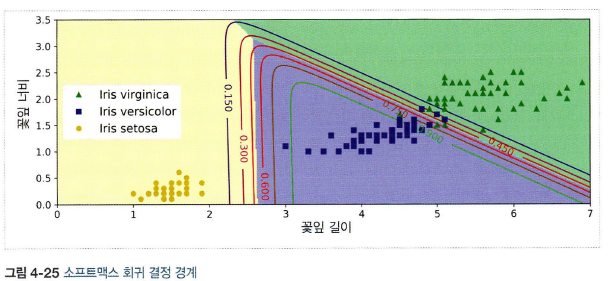